In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [37]:
top3_jobs = df.groupby(by='job_title_short')['job_title_short'].count().sort_values(ascending = False).head(3).index.to_list()
df_exploded = df.explode('job_skills')

In [67]:
df_exploded = df_exploded[df_exploded['job_title_short'].isin(top3_jobs)]
df_exp = df_exploded.pivot_table(index = 'job_skills', columns= 'job_title_short', aggfunc = 'size')
df_exp_1 = df_exp[top3_jobs[0]].sort_values(ascending = False).head(5)
df_exp_2 = df_exp[top3_jobs[1]].sort_values(ascending = False).head(5)
df_exp_3 = df_exp[top3_jobs[2]].sort_values(ascending = False).head(5)

<Axes: ylabel='job_skills'>

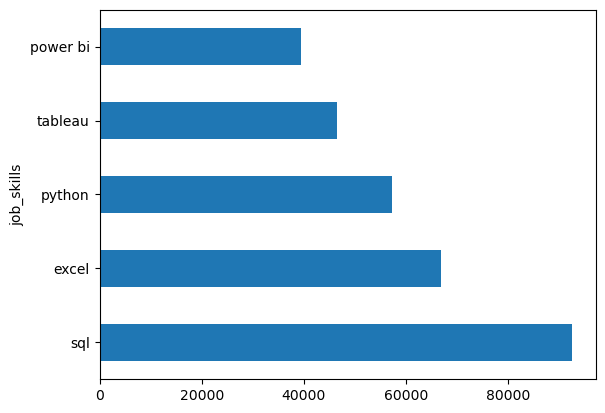

In [ ]:
import seaborn as sns
